# W207 Final Project: Home Price Prediction

*Authors: Jun Jun Peh, Matanaporn Ploy Cheewadhanaraks*

## INTRODUCTION

The objective of this project is to build machine learning models to predict home prices based on various housing characteristics by using data from Kaggle’s Ames Housing dataset. This project will be valuable to the real estate companies and agents in predicting the sales price for each house.
We started with exploratory data analysis to study the distribution and statistics of sale prices and their correlation with feature variables, and then came up with a set of selected features that we will use to build the models. We aimed to leverage several machine learning algorithms we learned from class to buid the most fit model. 

Organization of our analysis will be as follows:
- Data preparation
- Exploratory analysis 
- Feature selection
- Modeling and Ensembling
- Conclusion
- Reference

## 1) Dataset Download and Preparation

### 1.1 Import necessary packages for analysis

In [1]:
# default libraries imported for python notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats 

# libraries for ML models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor

### 1.2 Import Dataset from Kaggle

In [2]:
#read train and test dataset into dataframe
full_train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
print("Shape of train dataset:",full_train_df.shape)
#check size of full dataset
full_train_df.head(10)

Shape of train dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
#Split train data into train data (80% of data) and development data (20% of data)
#create copy to not alter the original dataset
split_train = int(full_train_df.shape[0]*0.2)
dev_df = full_train_df.copy().iloc[:split_train]
train_df =  full_train_df.copy().iloc[split_train:]

In [4]:
#drop Id column which is not relevant to what we will be doing
train_df.drop(['Id'], axis = 1, inplace = True)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
292,50,RL,60.0,11409,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,131000
293,60,RL,NaN,16659,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,235000
294,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,167000
295,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
296,50,RM,75.0,13710,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,152000


## 2) EXPLORATORY DATA ANALYSIS (EDA)

### 2.1 Initial Features Study

In [5]:
#look at all features available
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
#check total number of features - excluding SalePrice
print("Number of features: ", len(train_df.columns)-1)

Number of features:  79


Our dataset contains a wide variety of features ranging from areas of each particular part of the houses,  number of rooms, year built and sold, overall and specific housing qualities, types of building materials, external factors such as street and neighborhood, and many others.  

Text(0.5,1,'Bar Chart of Home Features with Most Missing Values')

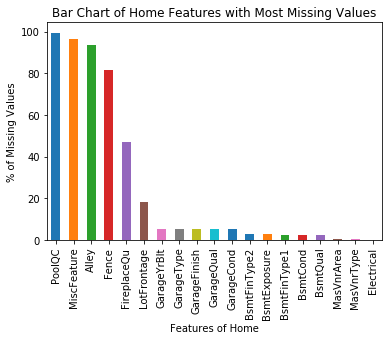

In [7]:
#check for null value in features
null_feature = train_df.isnull().sum()
pcnt_null = null_feature/(len(train_df))*100   # convert to % missing
pcnt_null = pcnt_null[pcnt_null>0]     # only display features with missing values
pcnt_null.sort_values(inplace=True, ascending=False)
pcnt_null.plot.bar()
plt.xlabel("Features of Home")
plt.ylabel("% of Missing Values")
plt.title("Bar Chart of Home Features with Most Missing Values")

There are some features with a lot of missing values in the dataset, which could be a disturbance to our study. There are around 6 features that have distinctively high null values, thus we decided to remove them from the dataset.

In [8]:
#select top NA features to drop from study
null_features_to_drop = pcnt_null.index[0:6]
null_features_to_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [9]:
#Drop features with much null values in the dataframe
train_df.drop(null_features_to_drop, axis = 1, inplace = True)

In [10]:
#split nonnumerical and numerical features
cat_features = train_df.select_dtypes(include=['object'])
num_features = train_df.select_dtypes(exclude=['object'])

print("string features:", len(cat_features.columns))
print("numeric features:", len(num_features.columns))

string features: 38
numeric features: 36


In total, we are left with 74 features in total: 36 numeric features and 38 string features
Then, we fill the rest of null values based on feature type.  

In [11]:
#fill null categorical values with 'NA'
for col in list(cat_features.columns):
    train_df[col].fillna('NA', inplace=True)
    dev_df[col].fillna('NA', inplace=True)
    test_df[col].fillna('NA', inplace=True)
#fill null numerical values with 0
for col in list(num_features.columns):
    train_df[col].fillna(0, inplace=True)
    dev_df[col].fillna(0, inplace=True)
    
for col in list(num_features.columns[0:-1]):
    test_df[col].fillna(0, inplace=True)

In [12]:
cat_features.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

We notice that some of the values are ordinal and can be converted into ranking numbers, such that these features are interpretable by our models. We then assume that the rating scale is linear. 

In [13]:
#convert some of the quality/condition variables into scale numbers 
for col in ['ExterQual', 'ExterCond','BsmtQual', 'BsmtCond','BsmtExposure', 'HeatingQC', 'KitchenQual','GarageQual', 'GarageCond']:
    train_df[col] = train_df[col].replace(dict(Ex=5, Gd=4, TA=3, Fa=2, Po=1, NA = 0))
    dev_df[col] = dev_df[col].replace(dict(Ex=5, Gd=4, TA=3, Fa=2, Po=1, NA = 0))
    test_df[col] = test_df[col].replace(dict(Ex=5, Gd=4, TA=3, Fa=2, Po=1, NA = 0))
for col in ['BsmtFinType1', 'BsmtFinType2']:
    train_df[col] = train_df[col].replace(dict(GLQ=6, ALQ=5, BLQ=4, Rec=3, LwQ=2, Unf=1, NA=0))
    dev_df[col] = dev_df[col].replace(dict(GLQ=6, ALQ=5, BLQ=4, Rec=3, LwQ=2, Unf=1, NA=0))
    test_df[col] = test_df[col].replace(dict(GLQ=6, ALQ=5, BLQ=4, Rec=3, LwQ=2, Unf=1, NA=0))

Then we convert string features into dummy variables, resulting an increase in number of features.

In [14]:
#Encode categorical variables using dummies
train_df_dummy = pd.get_dummies(train_df, drop_first=True)
dev_df_dummy = pd.get_dummies(dev_df, drop_first=True)
test_df_dummy = pd.get_dummies(test_df, drop_first=True)
#check total number of features
print("Number of features: ",len(train_df_dummy.columns)-1)

Number of features:  205


#### Select top 25 features with highest correlation with Sale Price

In order to have a clear view of how the key variables relate to SalePrice, we decided to use the correlation heatmap to calculate and compare correlation coefficients

In [15]:
#this function will show top features based on highest correlation with Sale prices
def top_feature(k):
    #show matrix of features with highest correlation 
    corrmat = train_df_dummy.corr()
    hi_cols = corrmat.nlargest(k+1, 'SalePrice')['SalePrice'].index
    cm = np.corrcoef(train_df_dummy[hi_cols].values.T)
    #plot the matrix
    sns.set(font_scale=1.25)
    fig, ax = plt.subplots(figsize=(14,14))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=hi_cols.values, xticklabels=hi_cols.values, ax = ax)
    plt.show()

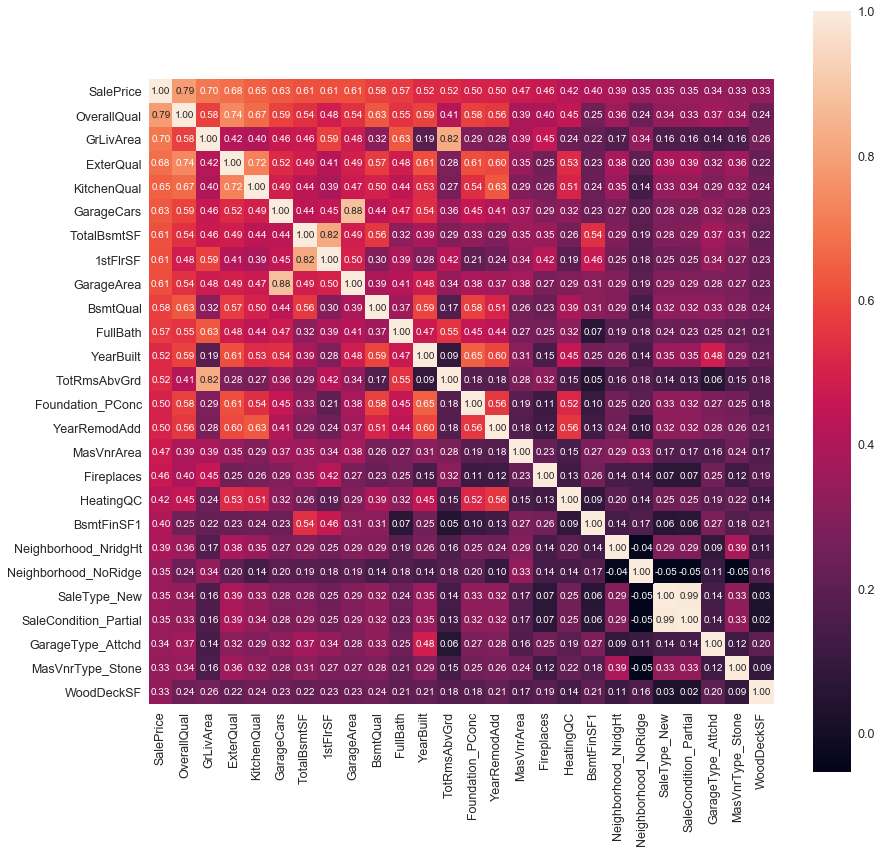

In [16]:
# set initial value of number of features
feature_num = 25
top_feature(feature_num)

Based on the correlation matrix, the outstanding potential predictor is the overall quality which has a very high correlation with the outcome variable. Other interesting features are GrLivArea, ExterQual, KitchenQual which also have strong linear relationship with sale prices. We also notice that some of the features are also highly correlated with one another and we will consider removing the redundant ones later to avoid the multicolinearing issue.

### 2.2 Analysis on Outcome Variable: Sales Price

In [17]:
train_df_dummy['SalePrice'].describe()

count      1168.000000
mean     180717.091610
std       80657.857181
min       34900.000000
25%      130000.000000
50%      162000.000000
75%      213310.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5,1,'Histogram of Sales Price')

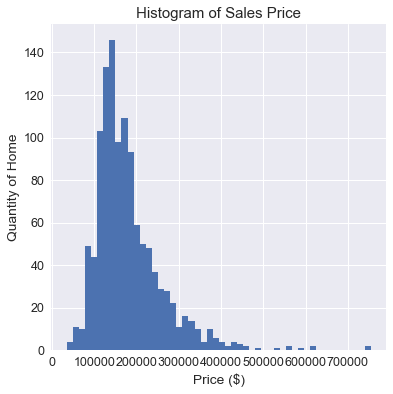

In [18]:
# some initial plots on SalesPrice
plt.figure(figsize=(6,6))
plt.hist("SalePrice", bins=50, data=train_df_dummy)
plt.xlabel("Price ($)")
plt.ylabel("Quantity of Home")
plt.title("Histogram of Sales Price")

Sales price has a right skewed distribution with mean around USD 180k. We notice from the histogram that there are some outliers in the data on the right side. Thus, we decided to remove these data points from the model as we expect that our linear regression model will be sensitive to these outliers

In [19]:
# Removing outliers from SalePrice
sales_threshold = 500000
train_df_normalized= train_df_dummy[train_df_dummy['SalePrice'] < sales_threshold]
print("Size of data before removing outliers:", len(train_df_dummy))
print("Size of data after removing outliers:", len(train_df_normalized))

Size of data before removing outliers: 1168
Size of data after removing outliers: 1160


We will also performed natural log transformation to reduce the skewness and normalize the distribution of our outcome variable

Text(0.5,1,'Histogram of log(Sales Price)')

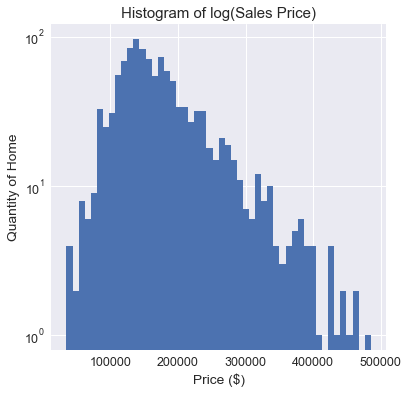

In [20]:
plt.figure(figsize=(6,6))
plt.hist("SalePrice", bins=50, data=train_df_normalized, log=True)
plt.xlabel("Price ($)")
plt.ylabel("Quantity of Home")
plt.title("Histogram of log(Sales Price)")

### 2.3 Analysis of Selected Categorical Features

In this section, we have selected some of the categorical features with high correlation with sale prices and taken a deeper look into their relationships

In [21]:
#function to create boxplot
def priceboxplot(var):
    data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);

#### 2.3.1 Overall Quality

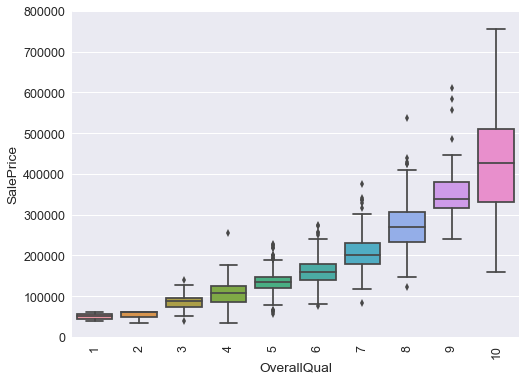

In [22]:
priceboxplot('OverallQual')

Overall quality feature variable, ranging from 1 to 10, has a very strong positive correlation with sales price.  The houses with overall quality rating 10, however, has the widest ranges of sales values

#### 2.3.2 Other quality ratings

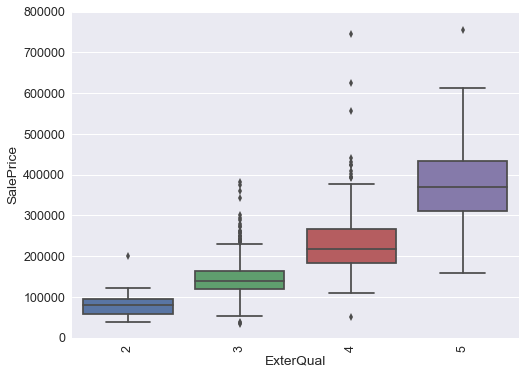

In [23]:
priceboxplot("ExterQual")

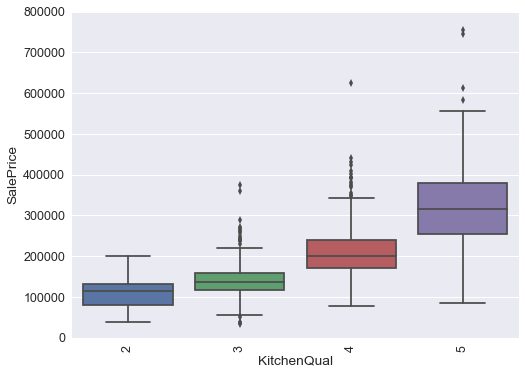

In [24]:
priceboxplot("KitchenQual")

 The houses that have good exterior material and kitchen quality ratings tend to have higher prices.

#### 2.3.3 Year Built

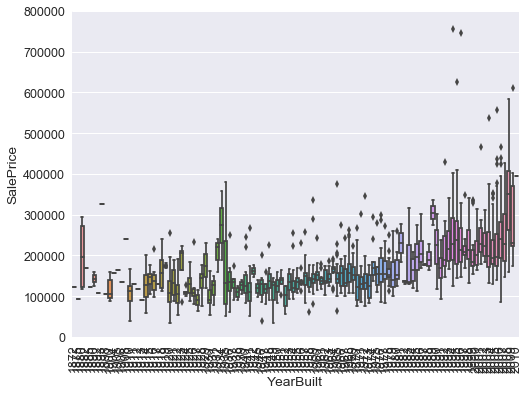

In [25]:
priceboxplot("YearBuilt")

This variable has quite a strong positive relationship with Sale prices and, as expected, the newer the house, the higher the value.

#### 2.3.4 Foundation

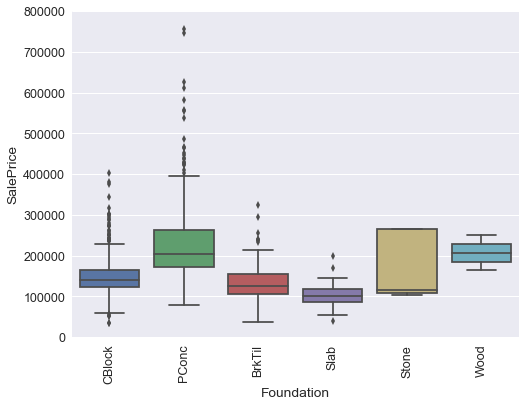

In [26]:
priceboxplot("Foundation")

We notice that on average the houses with concrete foundation attain higher valuation

#### 2.3.5 Neighborhood

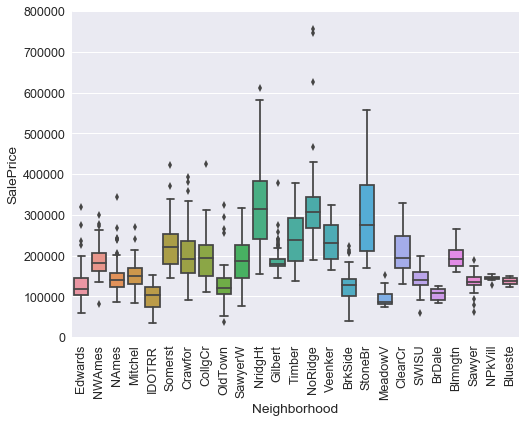

In [27]:
priceboxplot("Neighborhood")

Home prices also vary by location. We notice that Stone Brook and Northridge are rich neighboorhood. On the other hand, in some areas such as Meadow Village or Iowa DOT and Rail Road, home prices are distinctively low.

### 2.4 Analysis of Selected Numeric Features

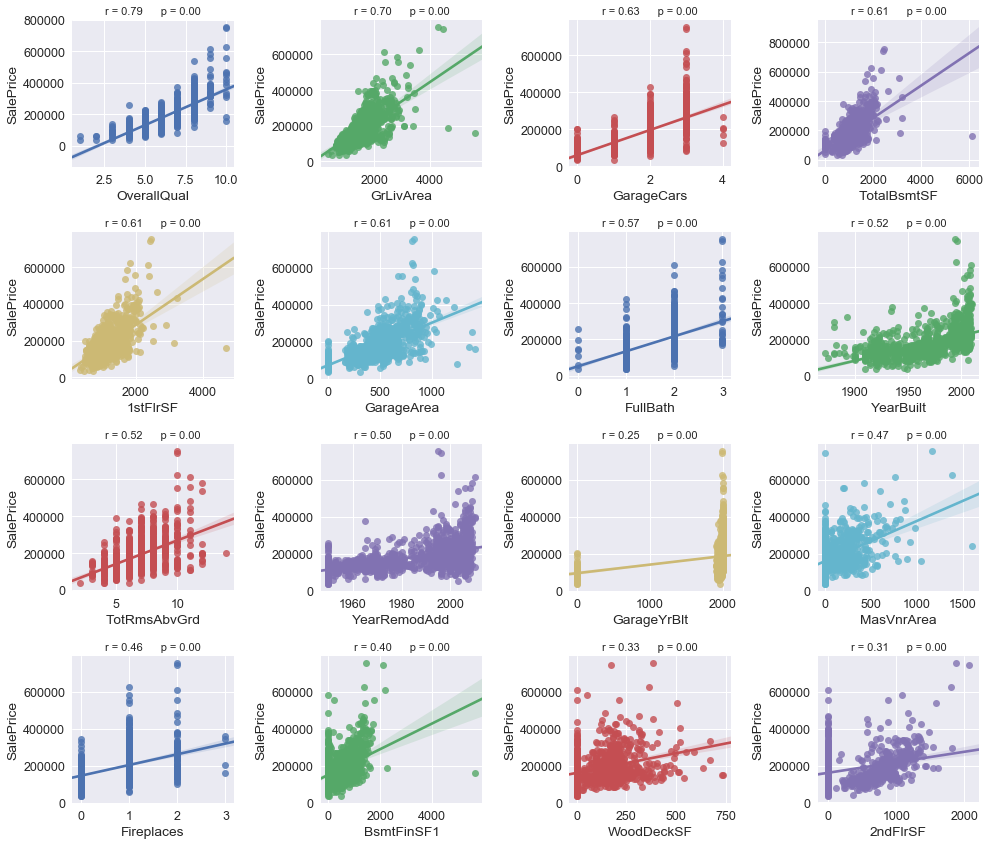

In [28]:
nr_rows = 4
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))
corrmat_num = num_features.corr()
hi_cols_num = corrmat_num.nlargest(20, 'SalePrice')['SalePrice'].index
li_plot_num_feats = hi_cols_num[1:nr_rows*nr_cols+1]

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(train_df[li_plot_num_feats[i]], train_df['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(train_df[li_plot_num_feats[i]],train_df['SalePrice'])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
plt.tight_layout()    
plt.show()  

Top numerical features having positive linear relationship with sales price are plotted above. 

Some outliers on GrLivArea, TotalBsmtArea, 1stFlrSF, and MasVnrArea with extremely high x-value but low y-value (or vice-versa) do not give much insight to our predictive modeling and thus can be safely removed. 

At the same time, MasVnrArea shows that some homes have zero Masonry Veneer area and yet the home prices varies from low to high. This feature will need to be further investigated.

## 3) Feature Selection

### 3.1 Outliers Removal

Based on the scatterplot analysis above, we decided to remove some of the outliers so that they will not be distorting our regression coefficients.

In [29]:
train_df_normalized_2 = train_df_normalized.copy()

# OverallQuality has outliers at quality larger than 8 but price lower than 300000
train_df_normalized_2 = train_df_normalized_2.drop(train_df_normalized_2[(train_df_normalized_2['OverallQual']>8) & (train_df_normalized_2['SalePrice']<300000)].index)

# GarageCar has outliers at area larger than 4000 but price lower than 200000
train_df_normalized_2 = train_df_normalized_2.drop(train_df_normalized_2[(train_df_normalized_2['GarageCars']>3) & (train_df_normalized_2['SalePrice']<200000)].index)

# TotalBsmtSF has outlier at extremely large basement area but low sales price
train_df_normalized_2 = train_df_normalized_2.drop(train_df_normalized_2[(train_df_normalized_2['TotalBsmtSF']>6000)].index)

# MasVnrArea has outlier at extremely large 1st floor area but low sales price
train_df_normalized_2 = train_df_normalized_2.drop(train_df_normalized_2[(train_df_normalized_2['MasVnrArea']<100) & (train_df_normalized_2['SalePrice']>700000)].index)

# Houses rarely have mode than 2 fireplaces
train_df_normalized_2 = train_df_normalized_2.drop(train_df_normalized_2[(train_df_normalized_2['Fireplaces']>2)].index)

# BsmtFinSF1 has outlier at area larger than 4000 but price lower than 200000
train_df_normalized_2 = train_df_normalized_2.drop(train_df_normalized_2[(train_df_normalized_2['BsmtFinSF1']>4000) & (train_df_normalized_2['SalePrice']<200000)].index)

print("Number of samples removed:", train_df_normalized.shape[0] - train_df_normalized_2.shape[0])

Number of samples removed: 11


### 3.2 Other Transformation

Transform YearBuilt into Age of House being build for the coefficient to be more interpretable

In [30]:
print(train_df_normalized_2['YearBuilt'].describe())
# created new column 'HouseAge'
train_df_normalized_2['HouseAge'] = abs(2010 - train_df_dummy['YearBuilt'])
print(train_df_normalized_2['HouseAge'].describe())

count    1149.000000
mean     1970.572672
std        30.335625
min      1872.000000
25%      1953.000000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64
count    1149.000000
mean       39.427328
std        30.335625
min         0.000000
25%        10.000000
50%        38.000000
75%        57.000000
max       138.000000
Name: HouseAge, dtype: float64


### 3.3 Feature selection based on correlation

**Multicolinearity**

Based on the heatmap, 'GarageArea' and 'GarageCars' seem to have similar correlationship with SalePrice. Thus we decided to choose GarageArea only to be included in our model. Similarly, for the same reason we drop 'TotRmsAbvGrd' and '1stFlrSF' which have high correlation with GrLivArea and 'TotalBsmtSF' respectively. 'YearBuit' and 'GarageYrBlt' will also be dropped when we added 'HouseAge' variable. 

In [31]:
# Drop features with much null values in the dataframe
redundant_features_to_drop = ['YearBuilt','GarageYrBlt', 'GarageArea','TotRmsAbvGrd','1stFlrSF']
top_df = train_df_normalized_2.copy()
top_df.drop(redundant_features_to_drop, axis = 1, inplace = True)
print('features on final dataframe for modeling:\n', top_df.columns)

features on final dataframe for modeling:
 Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'HouseAge'],
      dtype='object', length=202)


In [32]:
#This function will produce a final dataframe with top features with more than minimum correlation (after dropping redundant features)
def select_features(df, mincorr):
    corrmat = top_df.corr()
    corr = corrmat.nlargest(50, 'SalePrice')['SalePrice']
    selected_cols = list(corr[corr.values > mincorr].index)
    print(selected_cols)
    final_df = top_df[selected_cols]
    return(final_df)

The final dataframe will contain the filtered features that have reasonable and highest correlation with SalePrice of house. It will be used as the base for our statistical modeling. In order to limit the number of features and select the most relevant features, we set the correlation cutoff at 0.2 (weak to moderate correlation).


In [33]:
#set minimum correlation to be 0.2
final_df = select_features(top_df,0.2)
print("Number of final features:",len(final_df.columns)-1)

['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'TotalBsmtSF', 'BsmtQual', 'FullBath', 'YearRemodAdd', 'Foundation_PConc', 'Fireplaces', 'MasVnrArea', 'HeatingQC', 'BsmtFinSF1', 'Neighborhood_NridgHt', 'GarageType_Attchd', 'SaleType_New', 'SaleCondition_Partial', 'MasVnrType_Stone', 'WoodDeckSF', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'OpenPorchSF', 'BsmtFinType1', 'Neighborhood_NoRidge', 'GarageCond', 'GarageQual', 'HalfBath', 'BsmtExposure_4', '2ndFlrSF', 'CentralAir_Y', 'Electrical_SBrkr', 'LotArea', 'BsmtFullBath', 'PavedDrive_Y', 'BsmtCond', 'MSZoning_RL', 'HouseStyle_2Story', 'RoofStyle_Hip', 'GarageType_BuiltIn', 'MasVnrType_BrkFace', 'BsmtUnfSF', 'GarageFinish_RFn']
Number of final features: 43


## 4) MODELING

Train labels and development labels are created based on the sale price of final_df and dev_df respectively created from feature engineering above.

### 4.1 Model Dataset Customization

In [34]:
# separate SalePrice as train and dev label
train_label = final_df['SalePrice']
dev_label = dev_df['SalePrice']

Training, development, and test data (and labels) are being converted into matrix form and normalized before feeding to the models.

In [35]:
#extract list of features that we would like to run model
selected_feature = list(final_df.columns)[1:]

#convert feature data into matrix
train_data_matrix = final_df.as_matrix(columns = selected_feature)
train_label_matrix = train_label.as_matrix()
dev_data_matrix = dev_df_dummy.as_matrix(columns = selected_feature)
dev_label_matrix = dev_label.as_matrix()
test_data_matrix = test_df_dummy.as_matrix(columns = selected_feature)
# dev_data_matrix

#normalize the scale
scaler = preprocessing.StandardScaler().fit(train_data_matrix)
train_matrix_scaled = scaler.transform(train_data_matrix)
dev_matrix_scaled_raw = scaler.transform(dev_data_matrix)
dev_matrix_scaled = np.nan_to_num(dev_matrix_scaled_raw)
test_matrix_scaled_raw = scaler.transform(test_data_matrix)
test_matrix_scaled = np.nan_to_num(test_matrix_scaled_raw)

print(train_matrix_scaled.shape)    
print(dev_matrix_scaled.shape)
print(test_matrix_scaled.shape)

(1149, 43)
(292, 43)
(1459, 43)


### 4.2 Linear Regression Model

In [36]:
# use linear regression as our first model
model1_lr = LinearRegression()
model1_lr.fit(train_data_matrix, train_label_matrix)
lr_pred = model1_lr.predict(dev_data_matrix)
#calculate standard errors and R squared
lr_SE = np.sqrt(mean_squared_error(dev_label_matrix, lr_pred))
coeff = model1_lr.coef_
r2score = r2_score(dev_label, lr_pred)
print('LR RMSE: {}'.format(round(lr_SE,3)))
print('LR Reg R2 score: {:.3}'.format(r2score))

LR RMSE: 26019.804
LR Reg R2 score: 0.878


Linear Regression is the first model we trained, and it gave us a baseline model with R2 score of 0.873 on our development data set. Note that the RMSE value is based on the raw sale price and we further look into the log version of linear regression.

As the initial baseline model, coefficients of the top labels are printed out to confirm their correlation with SalePrice.

In [37]:
# check coefficient on each label
lr_list = [('Features', selected_feature),
         ('Coefficients',coeff.tolist())]
lr_df = pd.DataFrame.from_items(lr_list)
lr_df.head(10)

,Features,Coefficients
0,OverallQual,12478.327654
1,GrLivArea,42.123964
2,ExterQual,8960.502592
3,KitchenQual,7953.043166
4,GarageCars,7807.232615
5,TotalBsmtSF,21.632208
6,BsmtQual,3025.347397
7,FullBath,-2570.423439
8,YearRemodAdd,167.181783
9,Foundation_PConc,3331.731758


### 4.3 Log Linear Regression Model

We then transform sale prices into logarithmic scale as our exploratory analysis suggests before feeding into the linear regression model.

In [38]:
#log transforming our outcome variable
train_label_log = np.log(train_label)
dev_label_log = np.log(dev_label)

In [39]:
#fit linear regression
model1_lr_log = LinearRegression()
model1_lr_log.fit(train_matrix_scaled, train_label_log)
lr_pred_log = model1_lr_log.predict(dev_matrix_scaled)
#calculate standard errors and R squared
lr_log_SE = np.sqrt(mean_squared_error(dev_label_log, lr_pred_log))
lr_log_R2 = r2_score(dev_label_log, lr_pred_log)
print('Log LR RMSE: {:.3}'.format(lr_log_SE))
print('Log LR Reg R2 score: {:.3}'.format(lr_log_R2))

Log LR RMSE: 0.128
Log LR Reg R2 score: 0.89


Log linear regression produced a slightly higher R2 score. We are interested to see how accurately our model predicts the prices as compared to actual home price, hence plotted a sample below.

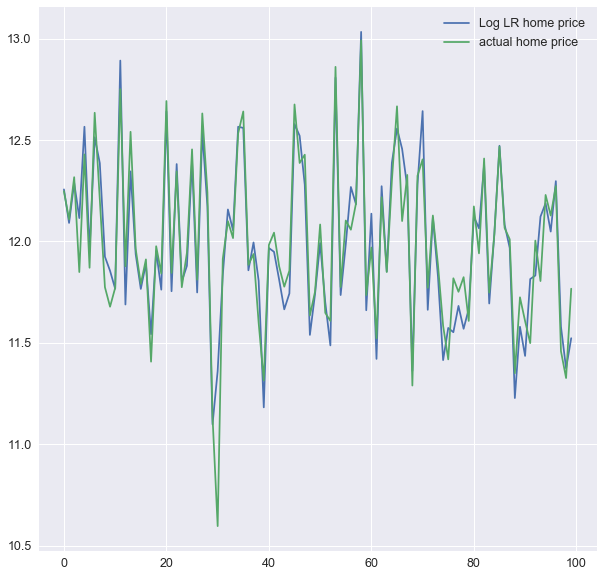

In [40]:
#show the comparison between predicted vs actual homeprice in the development data
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(lr_pred_log[0:100], label = "Log LR home price")
plt.plot(dev_label_log[0:100], label = "actual home price")
plt.legend(loc='upper right')

We used this as our baseline / benchmark model. R2 score that we obtained is quite high at 0.88 and based on the graphs we can see that in general we are able to correctly predict the price trend. There are some of the outliers that we missed since we underestimated the magnitude. Next step, we will try several machine learning algorithm on the data to see which one gives us better accuracy.

### 4.4 KNN Regression Model 

K Nearest-Neighbors Regressor predicts the target based on local interpolation of targets associated to nearest 'neighbors' or data in the training set. The most optimal number of neighbors is determined using cross-validated grid search before feeding into the model.

In [41]:
#search for optimal k value
k_values = list(range(1,15,2))
model_knn = KNeighborsRegressor()
param_grid_knn = dict(n_neighbors=k_values)
grid_knn = GridSearchCV(model_knn, param_grid_knn, cv = 5)
grid_knn.fit(train_matrix_scaled, train_label_log)
knn_best_val = grid_knn.best_params_
print("Optimal k value:")
print(grid_knn.best_params_,)

Optimal k value:
{'n_neighbors': 9}


In [42]:
#fit knn model using best k value obtained above
knn = KNeighborsRegressor(n_neighbors=knn_best_val.get('n_neighbors'), weights='distance') # initialize the model
knn.fit(train_matrix_scaled, train_label_log)
knn_pred = knn.predict(dev_matrix_scaled)
#calculate standard errors and R squared
knn_SE = np.sqrt(mean_squared_error(dev_label_log, knn_pred))
knn_R2 = r2_score(dev_label_log, knn_pred)

print('KNN RMSE: {:.3}'.format(knn_SE))
print('KNN Reg R2 score: {:.3}'.format(knn_R2))

KNN RMSE: 0.171
KNN Reg R2 score: 0.805


### 4.5 Ridge Regression

Cross-validated Ridge Regression is another OLS model we used. This model imposed a penalty on the size of coefficients for features selected. Different regulation strengths (alpha) are being tried to improve the conditioning of the problem and reduces the variance of the estimates.

In [43]:
#initialize the model
ridgeCV = RidgeCV(alphas = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0], normalize = True, store_cv_values = True) 
#fit the data
ridgeCV.fit(train_matrix_scaled, train_label_log) 
ridge_pred= ridgeCV.predict(dev_matrix_scaled)
#calculate standard errors and R squared
ridge_SE = np.sqrt(mean_squared_error(dev_label_log, ridge_pred))
ridge_R2 = r2_score(dev_label_log, ridge_pred)

print('Ridge Regression RMSE: {:.3}'.format(ridge_SE))
print('Ridge Regression R2 score: {:.3}'.format(ridge_R2))

Ridge Regression RMSE: 0.127
Ridge Regression R2 score: 0.891


### 4.6 Lasso Regression

Lasso Regression is a linear model that estimates sparse coefficients. It is trained with L1 prior as regularizer.

In [44]:
# initialize lasso regression model
lasso_model = Lasso(alpha = 0.01)  # choosing other alpha gives similar score
lasso_model.fit(train_matrix_scaled, train_label_log)
lasso_pred = lasso_model.predict(dev_matrix_scaled)
#calculate standard errors and R squared
lasso_SE = np.sqrt(mean_squared_error(dev_label_log, lasso_pred))
lasso_R2 = r2_score(dev_label_log, lasso_pred)

print('Lasso Regression RMSE: {:.3}'.format(lasso_SE))
print('Lasso Regression R2 score: {:.3}'.format(lasso_R2))

Lasso Regression RMSE: 0.128
Lasso Regression R2 score: 0.89


### 4.7 Decision Tree

Decision Tree regression creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data features based upon the depth of the tree.

In [45]:
from sklearn.tree import DecisionTreeRegressor
param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30]}
dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
dtree.fit(train_matrix_scaled, train_label_log)
dtree_pred = dtree.predict(dev_matrix_scaled)
#calculate standard errors and R squared
dtree_SE = np.sqrt(mean_squared_error(dev_label_log, dtree_pred))
dtree_R2 = r2_score(dev_label_log, dtree_pred)
print('Decision Tree RMSE: {:.3}'.format(dtree_SE))
print('Decision R2 score: {:.3}'.format(dtree_R2))

Decision Tree RMSE: 0.208
Decision R2 score: 0.712


We can see here that the decision tree regression model does not fit well with data and give low accuracy compared to other models.

### 4.8 Gradient Boosting

In order to improve fitness and accuracy further, we also try Gradient Boosting which is an ensemble-based model that allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function. The intuition behind this model is to repetitively leverage patterns in residuals (in another word, to minimize residual) and strengthen models with weak predictions.

In [46]:
# initialize gradient boosting model
np.random.seed(10)
gboost_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, subsample=1.0, alpha=0.8, max_depth=5, max_features='sqrt', min_samples_leaf=15, min_samples_split=10)
gboost_model.fit(train_matrix_scaled, train_label_log)
gboost_pred = gboost_model.predict(dev_matrix_scaled)
#calculate standard errors and R squared
gboost_SE = np.sqrt(mean_squared_error(dev_label_log, gboost_pred))
gboost_R2 = r2_score(dev_label_log, gboost_pred)

print('Gradient Boosting RMSE: {:.3}'.format(gboost_SE))
print('Gradient Boosting R2 score: {:.3}'.format(gboost_R2))

Gradient Boosting RMSE: 0.124
Gradient Boosting R2 score: 0.897


### 4.9 Light Gradient Boosting

LightGBM is a gradient boosting framework that uses tree based learning algorithms. Due to the fact that it uses histogram-based algorithms, which bucket continuous feature (attribute) values into discrete bins, it is faster to train and memory usage is smaller than other models.

In [47]:
# initialize gradient boosting model
lgboost_model = LGBMRegressor(objective='regression',num_leaves=4,learning_rate=0.05, n_estimators=1000,)
lgboost_model.fit(train_matrix_scaled, train_label_log)
lgboost_pred = lgboost_model.predict(dev_matrix_scaled)
#calculate standard errors and R squared
lgboost_SE = np.sqrt(mean_squared_error(dev_label_log, lgboost_pred))
lgboost_R2 = r2_score(dev_label_log, lgboost_pred)

print('Light Gradient Boosting RMSE: {:.3}'.format(lgboost_SE))
print('Light Gradient Boosting R2 score: {:.3}'.format(lgboost_R2))


Light Gradient Boosting RMSE: 0.12
Light Gradient Boosting R2 score: 0.904


### 4.10 Model Score Summary

To summarize what we have done so far, we compare the RMSE and R squared of all the models above and pick the high accuracy ones to predict the test data.

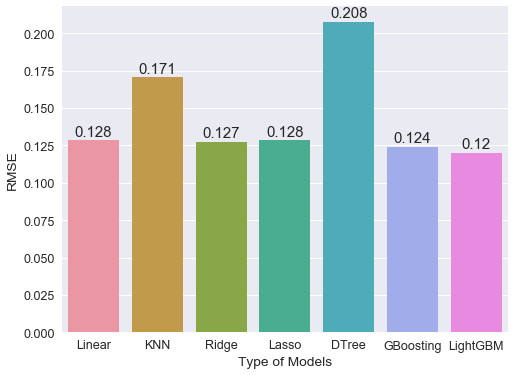

In [48]:
#plot RMSE by model
list_regressors = ['Linear','KNN','Ridge','Lasso', 'DTree', 'GBoosting', 'LightGBM']
list_SE = [lr_log_SE,knn_SE,ridge_SE,lasso_SE,dtree_SE, gboost_SE, lgboost_SE]
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
g=sns.barplot(x=list_regressors, y=list_SE, ax=ax)

# Text on the top of each barplot
count = 0
for i,item in enumerate(list_SE):
    ax.text(x = count, y = item+0.003, s = round(item,3), ha="center") 
    count = count + 1.0
plt.ylabel('RMSE')
plt.xlabel('Type of Models')
plt.show()

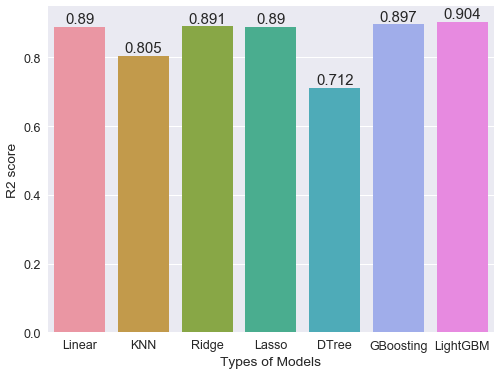

In [49]:
#plot R-squared score by model
list_R2 = [lr_log_R2,knn_R2,ridge_R2,lasso_R2,dtree_R2,gboost_R2, lgboost_R2]
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
g = sns.barplot(x=list_regressors, y=list_R2, ax=ax)
# Text on the top of each barplot
count = 0
for i,item in enumerate(list_R2):
    ax.text(x = count, y = item+0.01, s = round(item,3), ha="center") 
    count = count + 1.0
plt.ylabel('R2 score')
plt.xlabel('Types of Models')
plt.show()

### 4.11 Final Model 1: Averaging / Bagging

We used an averaging method to assign different weightages to 4 selected predictors, hoping to improve the stability and accuracy of final model by reducing the variance and avoiding overfitting. The final model accuracy will be determined by the combined/aggregated prediction average of each model.

In [50]:
# Average all models with different weightage as our final model (this is on dev_data)
w = [0.5,0.3,0.1,0.1]
combined_pred_on_dev = w[0]*gboost_pred + w[1]*lgboost_pred + w[2]*ridge_pred + w[3]*lasso_pred
print('Combined RMSE: {:.3}'.format(np.sqrt(mean_squared_error(dev_label_log, combined_pred_on_dev))))
print('Combined Boosting R2 score: {:.3}'.format(r2_score(dev_label_log, combined_pred_on_dev)))

Combined RMSE: 0.119
Combined Boosting R2 score: 0.905


### 4.12 Final Model 2: Stacking 

We also attempted Stacking technique to combine multiple regression models via a meta-regressor. The StackingCVRegressor uses the concept of out-of-fold predictions: the dataset is split into k folds, and in k successive rounds, k-1 folds are used to fit the first level regressor.

In [51]:
# need to reset index of dataframe before running stacking regressor
train_label_log = np.log(train_label)
dev_label_log = np.log(dev_label)
train_label_log = train_label_log.reset_index(drop=True)
print(train_label_log.head())  # print out train label
print(np.any(np.isnan(train_label_log)))  # check if any of the element is NaN
print(np.all(np.isfinite(train_label_log))) # check if all of the element is finite

0    11.782953
1    12.367341
2    12.025749
3    11.867097
4    11.931636
Name: SalePrice, dtype: float64
False
True


In [52]:
# combine multiple regression models via a meta-regressor (Gradient Boosting)
# models included: gboost_model, lgboost_model, lasso_model, ridgeCV, model1_lr_log
np.random.seed(42)
stack_model = StackingCVRegressor(regressors=(gboost_model,lgboost_model,lasso_model,ridgeCV,model1_lr_log),
                                  meta_regressor=gboost_model, use_features_in_secondary=True)
# lgboost_model.fit(train_matrix_scaled, train_label_log)
stack_model.fit(train_matrix_scaled, train_label_log)
stack_pred = stack_model.predict(dev_matrix_scaled)
stack_SE = np.sqrt(mean_squared_error(dev_label_log, stack_pred))
stack_R2 = r2_score(dev_label_log, stack_pred)
print('Stack Regressor RMSE: {}'.format(round(stack_SE,3)))
print('Stack Regressor R2 score: {:.3}'.format(stack_R2))

Stack Regressor RMSE: 0.124
Stack Regressor R2 score: 0.898


We picked averaging model to be used to predict the SalePrice of housing in test dataset since it is comparatively faster to train and gives us better stability as well as accuracy of around 0.91.

In [53]:
# averaging models to be used to predict test data
lr_pred_log2 = model1_lr_log.predict(test_matrix_scaled)
lasso_pred2 = lasso_model.predict(test_matrix_scaled)
ridge_pred2 = ridgeCV.predict(test_matrix_scaled)
gboost_pred2 = gboost_model.predict(test_matrix_scaled)
lgboost_pred2 = lgboost_model.predict(test_matrix_scaled)
combined_pred_on_test = w[0]*gboost_pred2 + w[1]*lgboost_pred2 + w[2]*ridge_pred2 + w[3]*lasso_pred2

## 5) SUBMISSION TO KAGGLE

The final predicted test data is stored in 'combined_pred_on_test'. It is then filled into dataframe associated to the respective 'Id' and saved into 'homeprice_submission.csv' for Kaggle submission.

In [54]:
# print out test columns for our final prediction 
print(test_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [55]:
# fill predicted SalePrice and Id on test data into dataframe for kaggle submission
print(combined_pred_on_test.shape)
test_submit = pd.DataFrame()
test_submit['Id'] = test_df['Id']
test_submit['SalePrice'] = combined_pred_on_test
print(test_submit.head())
test_submit.to_csv('homeprice_submission.csv',index=False)

(1459,)
     Id  SalePrice
0  1461  11.606385
1  1462  11.979691
2  1463  12.130115
3  1464  12.105269
4  1465  12.152575


## 6) CONCLUSION

According to our exploratary analysis, we selected home features based on their correlation with sale prices by including only the features with moderate correlation into the model. We also engineered new features by converting ordinal features into numeric representaion by assuming linear scales and turn the rest into binary, of 0 and 1. In the feature screening process, we also clean the data by removing outliers, redundant features, and features with a lot of missing values to come up with the final dataframe. For the outcome variable itself, the distribution is highly skewed, thus we decided to log transform the values before fitting the models. 

We initially selected Linear Regression and KNN as our baseline models in predicting home prices. After that, we explored several more models (linear and ensemble based) including Lasso Regression, Ridge Regression, Decision Tree, Gradient Boosting, and LightGBM as a process of accuracy improvement. We looked at both R-squared score and RMSE value as our outcome criterias to determine how efficient our models are. We also decided to implement stacking and bagging method, which include usage of multiple models together in predicting the sale price.

At the end of the study, we fed the test dataset into our final model to predict the sale price for test submission in Kaggle.

### 6.1 Concluding Thoughts on Future Improvements

After going through the full analysis in this project, we thought that the models can be further improved in predicting house prices in several ways, given more time and info/features:
* Given geospatial information regarding the home as features (i.e. if the house is located near to school / medical districts, if the house is located in premium area with low crime rate and etc.) 
* Given purchase behavior information to predict purchasing power (i.e. if they are first time buyers, how long have the houses been listed on the market?)
* Historical housing price trend in that area for a specific period of time

## 7) REFERENCE & ADDITIONAL RESOURCES

References from Kaggle:
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
- https://www.kaggle.com/harlfoxem/house-price-prediction-part-2
- https://www.kaggle.com/dgawlik/house-prices-eda/notebook
- https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

References on Python:
- https://seaborn.pydata.org/tutorial/distributions.html
- http://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/

Additional Notes:
- https://github.com/MIDS-W207/coursework/tree/master/Data